<a href="https://colab.research.google.com/github/Mr94t3z/pembelajaran-mesin/blob/master/meeting_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apriori

https://medium.com/analytics-vidhya/association-analysis-in-python-2b955d0180c

In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [2]:
## Use this to read data directly from github
df = pd.read_csv('https://raw.githubusercontent.com/Mr94t3z/pembelajaran-mesin/master/datasets/retail_dataset.csv', sep=',')
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [3]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{nan, 'Meat', 'Eggs', 'Bagel', 'Diaper', 'Wine', 'Pencil', 'Bread', 'Milk', 'Cheese'}


Untuk memanfaatkan modul apriori yang diberikan oleh library mlxtend, kita perlu mengonversi dataset sesuai keinginan. modul apriori memerlukan kerangka data yang memiliki 0 dan 1 atau Benar dan Salah sebagai data.

In [4]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [5]:
ohe_df

,NaN,Milk,Bagel,Meat,Eggs,Diaper,Wine,Pencil,Bread,Cheese
0,0,0,0,1,1,1,1,1,1,1
1,0,1,0,1,0,1,1,1,1,1
2,1,1,0,1,1,0,1,0,0,1
3,1,1,0,1,1,0,1,0,0,1
4,1,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
310,1,0,0,0,1,0,0,0,1,1
311,1,1,0,1,0,0,0,1,0,0
312,0,0,0,1,1,1,1,1,1,1
313,1,0,0,1,0,0,0,0,0,1


In [6]:
ohe_df = ohe_df.drop(ohe_df.columns[0], axis=1)

In [7]:
ohe_df

,Milk,Bagel,Meat,Eggs,Diaper,Wine,Pencil,Bread,Cheese
0,0,0,1,1,1,1,1,1,1
1,1,0,1,0,1,1,1,1,1
2,1,0,1,1,0,1,0,0,1
3,1,0,1,1,0,1,0,0,1
4,0,0,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...
310,0,0,0,1,0,0,0,1,1
311,1,0,1,0,0,0,1,0,0
312,0,0,1,1,1,1,1,1,1
313,0,0,1,0,0,0,0,0,1


In [8]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(1000)

,support,itemsets
0,0.501587,(Milk)
1,0.425397,(Bagel)
2,0.476190,(Meat)
3,0.438095,(Eggs)
4,0.406349,(Diaper)
5,0.438095,(Wine)
6,0.361905,(Pencil)
7,0.504762,(Bread)
8,0.501587,(Cheese)
9,0.225397,"(Milk, Bagel)"


In [9]:
rules = association_rules(freq_items, metric="support", min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Milk),(Bagel),0.501587,0.425397,0.225397,0.449367,1.056348,0.012023,1.043532
1,(Bagel),(Milk),0.425397,0.501587,0.225397,0.529851,1.056348,0.012023,1.060116
2,(Milk),(Meat),0.501587,0.476190,0.244444,0.487342,1.023418,0.005593,1.021752
3,(Meat),(Milk),0.476190,0.501587,0.244444,0.513333,1.023418,0.005593,1.024136
4,(Milk),(Eggs),0.501587,0.438095,0.244444,0.487342,1.112411,0.024701,1.096061
5,(Eggs),(Milk),0.438095,0.501587,0.244444,0.557971,1.112411,0.024701,1.127557
6,(Milk),(Wine),0.501587,0.438095,0.219048,0.436709,0.996835,-0.000695,0.997539
7,(Wine),(Milk),0.438095,0.501587,0.219048,0.500000,0.996835,-0.000695,0.996825
8,(Milk),(Bread),0.501587,0.504762,0.279365,0.556962,1.103415,0.026183,1.117823
9,(Bread),(Milk),0.504762,0.501587,0.279365,0.553459,1.103415,0.026183,1.116164


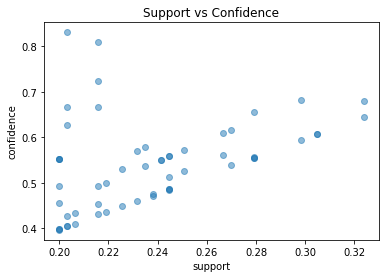

In [10]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

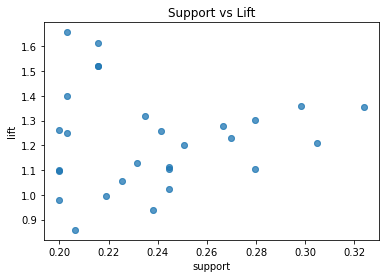

In [11]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

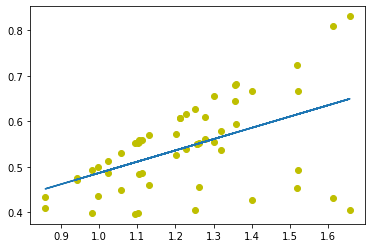

In [12]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))

# FP-Growth

https://towardsdatascience.com/the-fp-growth-algorithm-1ffa20e839b8

In [13]:
!pip install mlxtend

In [14]:
# store the item sets as lists of strings in a list
transactions = [
    ["beer", "wine", "cheese"],
    ["beer", "potato chips"],
    ["eggs", "flower", "butter", "cheese"],
    ["eggs", "flower", "butter", "beer", "potato chips"],
    ["wine", "cheese"],
    ["potato chips"],
    ["eggs", "flower", "butter", "wine", "cheese"],
    ["eggs", "flower", "butter", "beer", "potato chips"],
    ["wine", "beer"],
    ["beer", "potato chips"],
    ["butter", "eggs"],
    ["beer", "potato chips"],
    ["flower", "eggs"],
    ["beer", "potato chips"],
    ["eggs", "flower", "butter", "wine", "cheese"],
    ["beer", "wine", "potato chips", "cheese"],
    ["wine", "cheese"],
    ["beer", "potato chips"],
    ["wine", "cheese"],
    ["beer", "potato chips"],
]

In [15]:
# it is necessary for mlxtend to reorganise the data
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# instantiate a transaction encoder
my_transactionencoder = TransactionEncoder()

# fit the transaction encoder using the list of transaction tuples
my_transactionencoder.fit(transactions)

# transform the list of transaction tuples into an array of encoded transactions
encoded_transactions = my_transactionencoder.transform(transactions)

# convert the array of encoded transactions into a dataframe
encoded_transactions_df = pd.DataFrame(encoded_transactions, columns=my_transactionencoder.columns_)
encoded_transactions_df

,beer,butter,cheese,eggs,flower,potato chips,wine
0,True,False,True,False,False,False,True
1,True,False,False,False,False,True,False
2,False,True,True,True,True,False,False
3,True,True,False,True,True,True,False
4,False,False,True,False,False,False,True
5,False,False,False,False,False,True,False
6,False,True,True,True,True,False,True
7,True,True,False,True,True,True,False
8,True,False,False,False,False,False,True
9,True,False,False,False,False,True,False


In [16]:
%pip install mlxtend --upgrade

In [17]:
# our min support is 7, but it has to be expressed as a percentage for mlxtend
min_support = 7/len(transactions) 

# compute the frequent itemsets using fpgriowth from mlxtend
from mlxtend.frequent_patterns.fpgrowth import fpgrowth
frequent_itemsets = fpgrowth(encoded_transactions_df, min_support=min_support, use_colnames = True)

# print the frequent itemsets
frequent_itemsets

,support,itemsets
0,0.55,(beer)
1,0.40,(wine)
2,0.40,(cheese)
3,0.50,(potato chips)
4,0.35,(eggs)
5,0.35,"(wine, cheese)"
6,0.45,"(beer, potato chips)"


In [18]:
# Compute the association rules based on the frequent itemsets
from mlxtend.frequent_patterns import association_rules

# compute and print the association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(wine),(cheese),0.40,0.40,0.35,0.875000,2.187500,0.190,4.80
1,(cheese),(wine),0.40,0.40,0.35,0.875000,2.187500,0.190,4.80
2,(beer),(potato chips),0.55,0.50,0.45,0.818182,1.636364,0.175,2.75
3,(potato chips),(beer),0.50,0.55,0.45,0.900000,1.636364,0.175,4.50
